In [1]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table
from astroquery.xmatch import XMatch
import numpy as np
import pandas as pd
from pathlib import PurePath, PureWindowsPath

In [2]:
def rela_specpath(s):
    news = s.replace("file:///","")
    if '\\' in news:
        parts = PureWindowsPath(news).parts
    else:
        parts = PurePath(news).parts        
    path = parts[-2]+'/'+parts[-1]
    return path

In [3]:
df = pd.read_csv('./felostrong_all.csv')

In [4]:
df.columns

Index(['spUrl', 'templateGroup', 'templateName', 'z', 'targetID', 'objra',
       'objdec', 'userClass', 'userComments', 'newpath', 'fname', 'reject'],
      dtype='object')

In [5]:
df['relapath'] = df.spUrl.apply(rela_specpath)

In [6]:
df = df.loc[:, ['objra', 'objdec', 'z', 'userClass', 'relapath']]

In [7]:
df

,objra,objdec,z,userClass,relapath
0,262.70457,58.849891,2.039971,FeLoStrong,sdss_a/spec-0366-52017-0558.fits
1,204.64096,3.756179,1.305021,FeLoStrong,sdss_a/spec-0853-52374-0048.fits
2,145.82341,54.284715,2.227906,FeLoStrong,sdss_a/spec-7283-57063-0226.fits
3,213.61793,18.946104,0.607259,FeLoStrong,sdss_b/spec-2758-54523-0614.fits
4,172.86374,9.615630,1.809472,FeLoStrong,sdss_a/spec-5375-55973-0472.fits
...,...,...,...,...,...
218,228.17768,44.109027,2.434958,FeLoStrong,spec_cand_snr5new/spec-6048-56072-0718.fits
219,140.85641,26.366499,1.588018,FeLoStrong,spec_cand_snr5new/spec-11677-58510-0991.fits
220,355.75108,22.650177,2.210527,FeLoStrong,spec_cand_snr5new/spec-6520-56541-0332.fits
221,329.17367,19.945538,2.174423,FeLoStrong,spec_cand_snr5new/spec-7573-56946-0118.fits


In [8]:
df.rename(columns={'objra':'ra', 'objdec':'dec'}, inplace=True)

In [9]:
c = SkyCoord(ra=df.ra.values*u.degree, dec=df.dec.values*u.degree,frame='icrs')
srahms = c.ra.to_string(unit=u.hourangle, sep='', precision=2, pad=True)
srahms2 = c.ra.to_string(unit=u.hourangle, sep=':', precision=2, pad=True)
sdecdms = c.dec.to_string(sep='', precision=2, alwayssign=True, pad=True)
sdecdms2 = c.dec.to_string(sep=':', precision=2, alwayssign=True, pad=True)
# df.loc[:,'Name'] = 'J'+pd.Series(srahms)+pd.Series(sdecdms)
s1 = pd.Series(srahms).str.slice(stop=4)
s2 = pd.Series(sdecdms).str.slice(stop=5)
df.loc[:,'Name'] = 'J'+s1+s2
# df.loc[:,'Coord'] = pd.Series(srahms2)+' '+pd.Series(sdecdms2)
# df.loc[:,'srahms2'] = srahms2
# df.loc[:,'sdecdms2'] = sdecdms2
# df.query('Jmag<17 and Kmag<16 and 1.2<z<2.4', inplace=True)
# df.sort_values(by='ra', inplace=True)
# df.reset_index(drop=True, inplace=True)

In [10]:
df.sort_values(by='ra', inplace=True)
df.reset_index(drop=True, inplace=True)

In [67]:
df.query('z>2.5')

,ra,dec,z,userClass,relapath,Name
24,121.00443,23.156275,2.812141,FeLoStrong,sdss_a/spec-4471-55617-0922.fits,J0804+2309
28,123.61020,36.787091,2.721660,FeLoStrong,sdss_a/spec-3804-55267-0152.fits,J0814+3647
37,133.88905,38.232913,3.415286,FeLoStrong,sdss_a/spec-4608-55973-0609.fits,J0855+3813
41,136.83458,36.847247,2.955787,FeLoStrong,sdss_a/spec-4643-55946-0404.fits,J0907+3650
43,137.25750,53.993317,2.577324,FeLoStrong,sdss_a/spec-5729-56598-0584.fits,J0909+5359
48,140.93127,47.889420,2.508697,FeLoStrong,sdss_a/spec-5731-56363-0452.fits,J0923+4753
54,146.64155,36.921348,2.843763,FeLoStrong,sdss_a/spec-8852-57449-0613.fits,J0946+3655
56,151.10373,12.489520,2.647980,FeLoStrong,sdss_a/spec-5328-55982-0195.fits,J1004+1229
67,155.29633,31.716642,2.586968,FeLoStrong,sdss_a/spec-10460-58161-0529.fits,J1021+3142
71,158.54276,34.700222,2.505866,FeLoStrong,spec_cand_snr5new/spec-4560-55575-0292.fits,J1034+3442


In [12]:
from specbox import SpecSDSS
import matplotlib.pyplot as plt

In [13]:
basepath = '/Users/yuming/astro/felobals/downloads/'

In [135]:
sp =  SpecSDSS(basepath+df.relapath[24])

/Users/yuming/tools/specbox/specbox/basemodule/basemodule.py:321: RuntimeWarning: divide by zero encountered in power
  self.err = data['ivar']**-0.5 * 1e-17


In [136]:
sp.to_restframe(z=df.z[24], inplace=True)

In [137]:
sp.trim([1950, 3250])

In [138]:
new_wave = np.linspace(2000, 3199, num=1200) * u.AA

In [139]:
sp.flux_conserve_resample(new_wave, True)

/Users/yuming/miniconda3/lib/python3.9/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/yuming/miniconda3/lib/python3.9/site-packages/specutils/manipulation/resample.py:198: RuntimeWarning: invalid value encountered in multiply
  out_variance = np.sum(pixel_uncer * resample_grid**2, axis=-1) / np.sum(


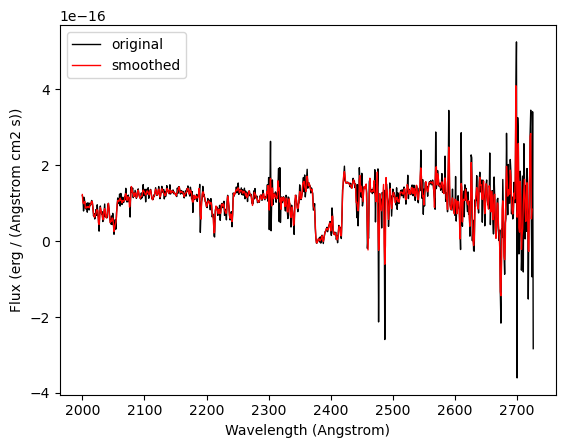

In [140]:
sp.smooth(5,3,inplace=True)

In [141]:
idx = np.isnan(sp.flux.value)

In [142]:
sp.flux.value[idx] = np.nanmedian(sp.flux.value)

In [143]:
sp.flux.value

array([1.22668863e-16, 1.02228970e-16, 9.85288485e-17, ...,
       1.15135634e-16, 1.15135634e-16, 1.15135634e-16])

<Axes: xlabel='Wavelength (Angstrom)', ylabel='Flux (erg / (Angstrom cm2 s))'>

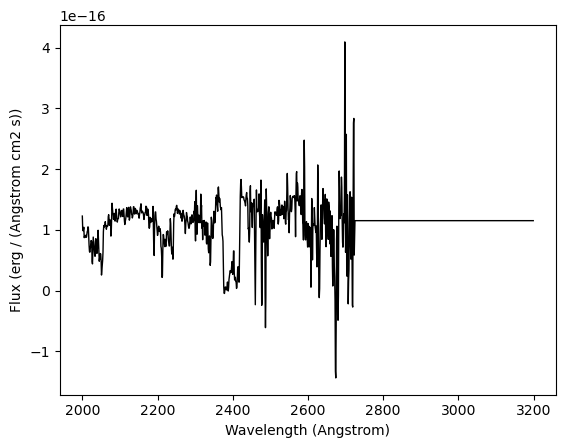

In [144]:
sp.plot()

In [74]:
tb = Table.from_pandas(df)

In [75]:
tbnew = XMatch.query(cat1=tb,
                     cat2='vizier:II/246/out',
                     max_distance=2 * u.arcsec, 
                     colRA1='ra',
                     colDec1='dec')

In [76]:
tbnew.write('./tspec23a_2mass.fits', overwrite=True)

In [77]:
df = tbnew.to_pandas()

In [78]:
df.to_csv('./tspec23a_2mass.csv', index=False)

In [80]:
df.to_excel('./tspec23a_2mass.xlsx')

In [79]:
df

,angDist,ra,dec,z,userClass,relapath,Name,Coord,2MASS,RAJ2000,...,Jmag,Hmag,Kmag,e_Jmag,e_Hmag,e_Kmag,Qfl,Rfl,X,MeasureJD
0,0.202876,44.74241,-0.474190,0.875176,FeLoStrong,sdss_a/spec-9372-58074-0974.fits,J0258-0028,02:58:58.18 -00:28:27.08,02585819-0028271,44.742460,...,16.575,16.361,15.663,0.122,0.207,0.222,BDD,222,0,2.451085e+06
1,0.169299,45.00232,0.807797,0.891310,FeLoStrong,sdss_a/spec-0410-51877-0623.fits,J0300+0048,03:00:00.56 +00:48:28.07,03000056+0048280,45.002367,...,15.092,14.594,14.108,0.048,0.074,0.070,AAA,222,0,2.451814e+06
2,0.205457,120.70079,55.224685,0.663171,FeLoStrong,sdss_a/spec-7281-57007-0616.fits,J0802+5513,08:02:48.19 +55:13:28.87,08024818+5513286,120.700785,...,16.467,15.944,14.659,0.104,0.134,0.090,ABA,222,0,2.451177e+06
3,0.270512,122.48913,18.301229,0.966473,FeLoStrong,sdss_a/spec-1923-53319-0023.fits,J0809+1818,08:09:57.39 +18:18:04.42,08095740+1818043,122.489205,...,16.297,15.798,15.303,0.096,0.124,0.151,ABB,222,0,2.451531e+06
4,0.113182,128.84490,42.716203,0.805863,FeLoStrong,sdss_a/spec-8280-57061-0366.fits,J0835+4242,08:35:22.78 +42:42:58.33,08352276+4242582,128.844859,...,15.948,15.698,15.048,0.083,0.145,0.129,ABB,222,0,2.451639e+06
5,0.179921,140.14830,52.668445,0.794352,FeLoStrong,sdss_a/spec-0767-52252-0321.fits,J0920+5240,09:20:35.59 +52:40:06.40,09203560+5240063,140.148374,...,16.562,15.855,15.166,0.126,0.149,0.125,BBB,222,0,2.451153e+06
6,0.075513,143.77683,57.925833,1.531131,FeLoStrong,sdss_a/spec-5715-56657-0505.fits,J0935+5755,09:35:06.44 +57:55:33.00,09350644+5755330,143.776861,...,16.158,15.285,15.008,0.092,0.104,0.114,AAB,222,0,2.451550e+06
7,0.234741,154.86405,2.422622,1.362947,FeLoStrong,sdss_a/spec-0503-51999-0464.fits,J1019+0225,10:19:27.37 +02:25:21.44,10192736+0225212,154.864022,...,16.369,15.215,15.114,0.099,0.083,0.152,BAB,222,0,2.451580e+06
8,0.554573,155.84501,50.083578,1.592925,FeLoStrong,sdss_a/spec-1008-52707-0124.fits,J1023+5005,10:23:22.80 +50:05:00.88,10232280+5005003,155.845016,...,16.991,16.257,15.746,0.182,0.227,0.223,CDD,222,0,2.451176e+06
9,0.089065,158.23072,8.584236,0.893494,FeLoStrong,sdss_a/spec-5344-55924-0796.fits,J1032+0835,10:32:55.37 +08:35:03.25,10325537+0835032,158.230745,...,15.772,15.655,15.238,0.089,0.155,0.178,ACC,222,0,2.451603e+06


In [83]:
df.query('ra>60 & ra<270 & Jmag<17.2 & Kmag<16.6', inplace=True)
df.reset_index(drop=True, inplace=True)

In [84]:
df.columns

Index(['angDist', 'ra', 'dec', 'z', 'userClass', 'relapath', 'Name', 'Coord',
       '2MASS', 'RAJ2000', 'DEJ2000', 'errHalfMaj', 'errHalfMin', 'errPosAng',
       'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X',
       'MeasureJD'],
      dtype='object')

In [85]:
df = df.loc[:,['Name','ra','dec','z','Jmag','Hmag','Kmag','relapath']]

In [90]:
df.drop_duplicates(subset='ra', inplace=True)
df.reset_index(drop=True, inplace=True)

In [91]:
df

,Name,ra,dec,z,Jmag,Hmag,Kmag,relapath
0,J0802+5513,120.70079,55.224685,0.663171,16.467,15.944,14.659,sdss_a/spec-7281-57007-0616.fits
1,J0809+1818,122.48913,18.301229,0.966473,16.297,15.798,15.303,sdss_a/spec-1923-53319-0023.fits
2,J0835+4242,128.84490,42.716203,0.805863,15.948,15.698,15.048,sdss_a/spec-8280-57061-0366.fits
3,J0920+5240,140.14830,52.668445,0.794352,16.562,15.855,15.166,sdss_a/spec-0767-52252-0321.fits
4,J0935+5755,143.77683,57.925833,1.531131,16.158,15.285,15.008,sdss_a/spec-5715-56657-0505.fits
5,J1019+0225,154.86405,2.422622,1.362947,16.369,15.215,15.114,sdss_a/spec-0503-51999-0464.fits
6,J1023+5005,155.84501,50.083578,1.592925,16.991,16.257,15.746,sdss_a/spec-1008-52707-0124.fits
7,J1032+0835,158.23072,8.584236,0.893494,15.772,15.655,15.238,sdss_a/spec-5344-55924-0796.fits
8,J1044+3656,161.24837,36.934765,0.701929,15.547,15.163,14.335,sdss_a/spec-8851-57460-0737.fits
9,J1055+3124,163.87001,31.403133,0.493223,15.923,15.425,14.457,sdss_b/spec-11386-58514-0593.fits


In [92]:
df.to_csv('./tspec23a_2mass_selected.csv', index=False)

In [8]:
# for i, name in enumerate(dfo['Name']):
#     if ~np.isnan(dfo.Separation[i]):
#         print("\\begin{{Target}}\n\
# \\targname{{{}}}\n\
# \\targra{{{}}}\n\
# \\targdec{{{}}}\n\
# \\targinfo{{J={:.2f}, $z={:.3f}$, FIR}}\n\
# \\end{{Target}}".format(name, 
#                         dfo['srahms2'][i], 
#                         dfo['sdecdms2'][i],dfo['Jmag'][i],dfo['z'][i]))
#     else:
#         print("\\begin{{Target}}\n\
# \\targname{{{}}}\n\
# \\targra{{{}}}\n\
# \\targdec{{{}}}\n\
# \\targinfo{{J={:.2f}, $z={:.3f}$}}\n\
# \\end{{Target}}".format(name, 
#                         dfo['srahms2'][i], 
#                         dfo['sdecdms2'][i],dfo['Jmag'][i],dfo['z'][i]))